<a href="https://colab.research.google.com/github/krishna324-art/LLM-from-Scratch-/blob/main/self_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
inputs=torch.tensor(
    [[0.43,0.15,0.89],#your
    [0.55,0.87,0.77],#journey
    [0.57,0.85,0.64],#starts
    [0.22,0.58,0.33],#with
    [0.77,0.25,0.10],#one
    [0.05,0.80,0.55]]#step
)

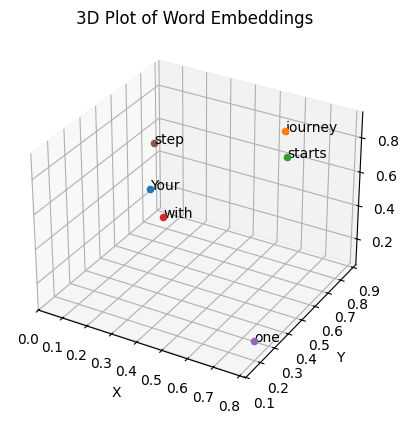

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

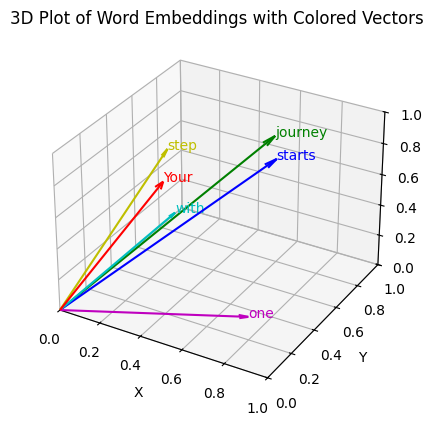

In [ ]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [ ]:
#the second input token serves as the query
query = inputs[1]
attn_scores_2=torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
    attn_scores_2[i]=torch.dot(query,x_i)#dot
print(attn_scores_2)

tensor([1.0523, 1.6523, 1.5458, 0.8797, 0.7180, 1.1470])


In [ ]:
attn_weights_2_tmp=attn_scores_2/attn_scores_2.sum()
print("attention weights:",attn_weights_2_tmp)
print("sum:",attn_weights_2_tmp.sum())


attention weights: tensor([0.1504, 0.2362, 0.2210, 0.1258, 0.1026, 0.1640])
sum: tensor(1.)


In [ ]:
import math
def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum(dim=0)
attn_weights_2_tmp=softmax_naive(attn_scores_2)
print("attention weights:",attn_weights_2_tmp)
print("sum:",attn_weights_2_tmp.sum())

attention weights: tensor([0.1405, 0.2560, 0.2302, 0.1182, 0.1006, 0.1545])
sum: tensor(1.0000)


In [ ]:
attn_weights_2=torch.softmax(attn_scores_2,dim=0)
print("attention weights:",attn_weights_2)
print("sum:",attn_weights_2.sum())

attention weights: tensor([0.1405, 0.2560, 0.2302, 0.1182, 0.1006, 0.1545])
sum: tensor(1.0000)


In [ ]:
query=inputs[1]
context_vec_2=torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
  context_vec_2+=attn_weights_2[i]*x_i
print("context vector:",context_vec_2)


context vector: tensor([0.4436, 0.6568, 0.6035])


In [ ]:
attn_scores=torch.empty(6,6)
for i,x_i in enumerate(inputs):
  for j,x_j in enumerate(inputs):
    attn_scores[i,j]=torch.dot(x_i,x_j)
print(attn_scores)

tensor([[0.9995, 1.0523, 0.9422, 0.4753, 0.4576, 0.6310],
        [1.0523, 1.6523, 1.5458, 0.8797, 0.7180, 1.1470],
        [0.9422, 1.5458, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8797, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7180, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.1470, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
attn_scores=inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 1.0523, 0.9422, 0.4753, 0.4576, 0.6310],
        [1.0523, 1.6523, 1.5458, 0.8797, 0.7180, 1.1470],
        [0.9422, 1.5458, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8797, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7180, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.1470, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
# Calculate attention weights for all inputs using the softmax function
attn_weights = torch.softmax(attn_scores, dim=1)

# Calculate the context vectors for all inputs
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4442, 0.5987, 0.6045],
        [0.4436, 0.6568, 0.6035],
        [0.4449, 0.6533, 0.5961],
        [0.4313, 0.6317, 0.5753],
        [0.4673, 0.5916, 0.5486],
        [0.4195, 0.6533, 0.5910]])


In [ ]:
#self attention with trainable weights
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]], # step     (x^6)
)

In [ ]:
x_2=inputs[1]#A
d_in=inputs.shape[1]#B
d_out=2

In [ ]:
torch.manual_seed(123)
W_query=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_key=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_value=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)


In [ ]:
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [ ]:
query_2=x_2@ W_query
key_2=x_2@W_key
value_2=x_2@W_value
print(query_2)

tensor([0.4306, 1.4551])


In [ ]:
keys=inputs@W_key
values=inputs@W_value
queries=inputs@W_query
print("keys.shape:",keys.shape)
print("values.shape:",values.shape)
print("queries.shape:",queries.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
queries.shape: torch.Size([6, 2])


In [ ]:
query_2=keys[1]#1
attn_score_2=query_2 @ keys.T
print(attn_score_2)

tensor([1.0357, 1.5004, 1.4672, 0.8725, 0.4569, 1.2461])


In [ ]:
atten_scores=queries @ keys.T
print(atten_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [ ]:
#scaling and softamxing
d_k=keys.shape[-1]
attn_weights_2=torch.softmax(attn_score_2/d_k**0.5,dim=-1)
print(attn_weights_2)
print(d_k)

tensor([0.1548, 0.2150, 0.2100, 0.1379, 0.1028, 0.1796])
2


In [ ]:
#context vector for journey
context_vec_2=attn_weights_2 @ values
print(context_vec_2)

tensor([0.3013, 0.8099])


In [ ]:
import torch.nn as nn
class Selfattention_v1(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.W_query=nn.Parameter(torch.rand(d_in,d_out))
    self.W_key=nn.Parameter(torch.rand(d_in,d_out))
    self.W_value=nn.Parameter(torch.rand(d_in,d_out))

  def forward(self,X):
    keys=X@self.W_key
    values=X@self.W_value
    queries=X@self.W_query

    attn_scores=queries @ keys.T
    attn_weights=torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)

    context_vecs=attn_weights @ values
    return context_vecs

In [ ]:
#context vectors
torch.manual_seed(123)
sa_v1=Selfattention_v1(d_in,d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [ ]:
import torch.nn as nn
class Selfattention_v2(nn.Module):
  def __init__(self,d_in,d_out,qkv_bias=False):
    super().__init__()
    self.W_query=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_key=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_value=nn.Linear(d_in,d_out,bias=qkv_bias)

  def forward(self,X):
    keys=self.W_key(X)
    values=self.W_value(X)
    queries=self.W_query(X)

    attn_scores=queries @ keys.T
    attn_weights=torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)

    context_vecs=attn_weights @ values
    return context_vecs

In [ ]:
#initialization through linear
torch.manual_seed(789)
sa_v2=Selfattention_v2(d_in,d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)
